In [38]:
# dictionary to store all algorithm data

# Sample
# {'Logistic Regression': {'accuracy': 0.85, 'precision': 0.82, 'recall': 0.88, 'f1_score': 0.85}}
models_performance = {}

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, recall_score, f1_score

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables

#Converting Categorical Variables to Numeric: Many machine learning models, including XGBClassifier, cannot handle categorical variables directly. The code identifies all columns of type 'object' in the DataFrame (assumed to be categorical) and converts them into numeric values using LabelEncoder. This is done by mapping each unique category to a unique integer.


le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
#specifying axis=1 refers to the operation being performed along the columns. This contrasts with axis=0, which would mean the operation is performed along the rows.
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["XGBClassifier"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.01
Training Accuracy: 100.00%
Validation Loss: 0.05
Validation Accuracy: 99.17%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1007
           1       0.95      1.00      0.97       193

    accuracy                           0.99      1200
   macro avg       0.98      1.00      0.98      1200
weighted avg       0.99      0.99      0.99      1200


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["GaussianNB"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.38
Training Accuracy: 85.95%
Validation Loss: 0.41
Validation Accuracy: 83.92%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1007
           1       0.00      0.00      0.00       193

    accuracy                           0.84      1200
   macro avg       0.42      0.50      0.46      1200
weighted avg       0.70      0.84      0.77      1200


D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Binomial
from sklearn.metrics import accuracy_score, classification_report, log_loss
import numpy as np

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = GLM(y_train, X_train, family=Binomial())
result = model.fit()

# Make predictions on the training set and calculate loss
y_pred_train = result.predict(X_train)
y_pred_train_proba = np.column_stack((1-y_pred_train, y_pred_train))
train_accuracy = accuracy_score(y_train, y_pred_train.round())
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = result.predict(X_val)
y_pred_val_proba = np.column_stack((1-y_pred_val, y_pred_val))
val_accuracy = accuracy_score(y_val, y_pred_val.round())
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val.round()))

models_performance["Generalized Linear Model"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.38
Training Accuracy: 85.89%
Validation Loss: 0.43
Validation Accuracy: 83.92%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1007
           1       0.00      0.00      0.00       193

    accuracy                           0.84      1200
   macro avg       0.42      0.50      0.46      1200
weighted avg       0.70      0.84      0.77      1200


D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model1.predict(X_train)
y_pred_train_proba = model1.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model1.predict(X_val)
y_pred_val_proba = model1.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val.round()))

models_performance["Logistic Regression"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.39
Training Accuracy: 85.95%
Validation Loss: 0.43
Validation Accuracy: 83.92%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1007
           1       0.00      0.00      0.00       193

    accuracy                           0.84      1200
   macro avg       0.42      0.50      0.46      1200
weighted avg       0.70      0.84      0.77      1200


D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetr

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Display first 10 actual vs. predicted responses from the test set
first_10_actual = y_test[:10]
first_10_predicted = y_pred_test[:10]

print("First 10 Actual Responses: ", first_10_actual.values)
print("First 10 Predicted Responses: ", first_10_predicted)

# Optionally, you could display them side by side for easier comparison
for actual, predicted in zip(first_10_actual, first_10_predicted):
    print(f"Actual: {actual}, Predicted: {predicted}")

models_performance["Decision Tree Classifier"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.00
Training Accuracy: 100.00%
Validation Loss: 1.41
Validation Accuracy: 96.08%
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1007
           1       0.81      0.99      0.89       193

    accuracy                           0.96      1200
   macro avg       0.90      0.97      0.93      1200
weighted avg       0.97      0.96      0.96      1200

First 10 Actual Responses:  [0 0 0 0 1 0 0 1 0 1]
First 10 Predicted Responses:  [0 0 1 0 1 0 0 1 0 1]
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["Random Forest Classifier"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.04
Training Accuracy: 100.00%
Validation Loss: 0.11
Validation Accuracy: 99.42%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1007
           1       1.00      0.96      0.98       193

    accuracy                           0.99      1200
   macro avg       1.00      0.98      0.99      1200
weighted avg       0.99      0.99      0.99      1200


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)
print("Training Accuracy: %.2f%%" % (train_acc * 100.0))
print("Validation Accuracy: %.2f%%" % (val_acc * 100.0))

# Predict classes
# Predict probabilities
y_pred_val_probs = model.predict(X_val)

# Convert probabilities to class labels
y_pred_val = (y_pred_val_probs > 0.5).astype(int).reshape(-1)

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["Sequential"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Epoch 1/10
175/175 [==============================] - 1s 3ms/step - loss: 0.4543 - accuracy: 0.8214 - val_loss: 0.4399 - val_accuracy: 0.8392
Epoch 2/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8596 - val_loss: 0.4195 - val_accuracy: 0.8400
Epoch 3/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8602 - val_loss: 0.4102 - val_accuracy: 0.8400
Epoch 4/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8616 - val_loss: 0.4015 - val_accuracy: 0.8408
Epoch 5/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8621 - val_loss: 0.3911 - val_accuracy: 0.8392
Epoch 6/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8637 - val_loss: 0.3828 - val_accuracy: 0.8383
Epoch 7/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8659 - val_loss: 0.3768 - val_accuracy: 0.8400
Epoch 

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["K-Neighbours Classifier"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.24
Training Accuracy: 88.16%
Validation Loss: 1.35
Validation Accuracy: 83.58%
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1007
           1       0.47      0.18      0.26       193

    accuracy                           0.84      1200
   macro avg       0.67      0.57      0.58      1200
weighted avg       0.80      0.84      0.80      1200


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["Linear Discriminant Classifier"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.38
Training Accuracy: 85.91%
Validation Loss: 0.43
Validation Accuracy: 83.92%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1007
           1       0.00      0.00      0.00       193

    accuracy                           0.84      1200
   macro avg       0.42      0.50      0.46      1200
weighted avg       0.70      0.84      0.77      1200


D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["Quadratic Discriminant Classifier"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.31
Training Accuracy: 86.75%
Validation Loss: 0.37
Validation Accuracy: 83.67%
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1007
           1       0.49      0.28      0.36       193

    accuracy                           0.84      1200
   macro avg       0.68      0.61      0.63      1200
weighted avg       0.81      0.84      0.82      1200


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier  # changed from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = GaussianProcessClassifier()  # changed from DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["Gaussian Process Classifier"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

Training Loss: 0.54
Training Accuracy: 100.00%
Validation Loss: 0.69
Validation Accuracy: 84.33%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1007
           1       1.00      0.03      0.05       193

    accuracy                           0.84      1200
   macro avg       0.92      0.51      0.48      1200
weighted avg       0.87      0.84      0.78      1200


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier  # changed from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.ensemble import AdaBoostClassifier

# Load the data
df = pd.read_csv('resources/Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Make predictions on the training set and calculate loss
y_pred_train = model.predict(X_train)
y_pred_train_proba = model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_proba)

# Make predictions on the validation set and calculate loss
y_pred_val = model.predict(X_val)
y_pred_val_proba = model.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_loss = log_loss(y_val, y_pred_val_proba)

# Print training and validation loss and accuracy
print("Training Loss: %.2f" % train_loss)
print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Validation Loss: %.2f" % val_loss)
print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))

# Print precision, recall, and F1 score for the validation set
print(classification_report(y_val, y_pred_val))

models_performance["Ada Boost Classifier"] = {
    'Training Loss': train_loss,
    'Training Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy':  val_accuracy
}

D:\Program_Files\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Loss: 0.63
Training Accuracy: 87.29%
Validation Loss: 0.64
Validation Accuracy: 84.83%
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1007
           1       0.63      0.14      0.23       193

    accuracy                           0.85      1200
   macro avg       0.74      0.56      0.57      1200
weighted avg       0.82      0.85      0.81      1200


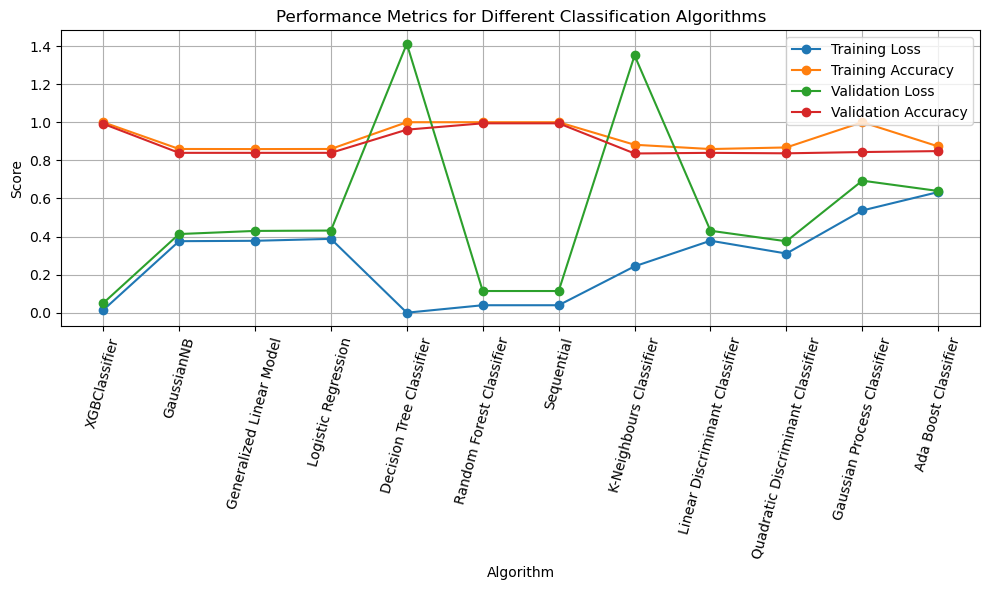

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Evaluate models and store performance metrics
# Convert dictionary to DataFrame
df_performance = pd.DataFrame(models_performance)

# Plot performance metrics
plt.figure(figsize=(10, 6))

# Loop through each performance metric
for metric in df_performance.index:
    plt.plot(df_performance.columns, df_performance.loc[metric], marker='o', label=metric)

plt.title('Performance Metrics for Different Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()
